In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#training_data scores
data_scores = pd.read_csv("../train_scores.csv")
data_scores.head()

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


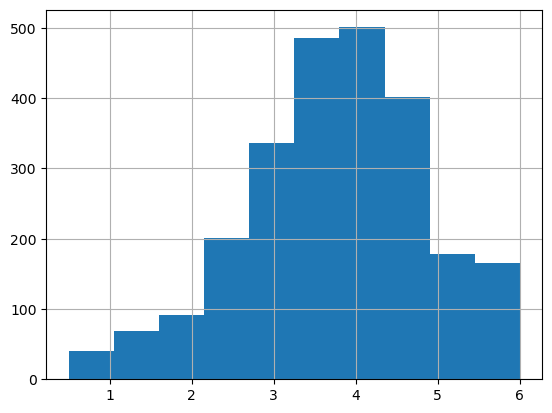

In [3]:
data_scores['score'].hist()
plt.show()

In [4]:
data_scores['score'].value_counts()

score
4.0    501
3.5    486
4.5    402
3.0    336
2.5    201
5.0    179
5.5    128
2.0     92
1.5     69
6.0     37
1.0     35
0.5      5
Name: count, dtype: int64

In [5]:
# training_data features
data_features = pd.read_csv("../train_logs.csv")
data_features.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


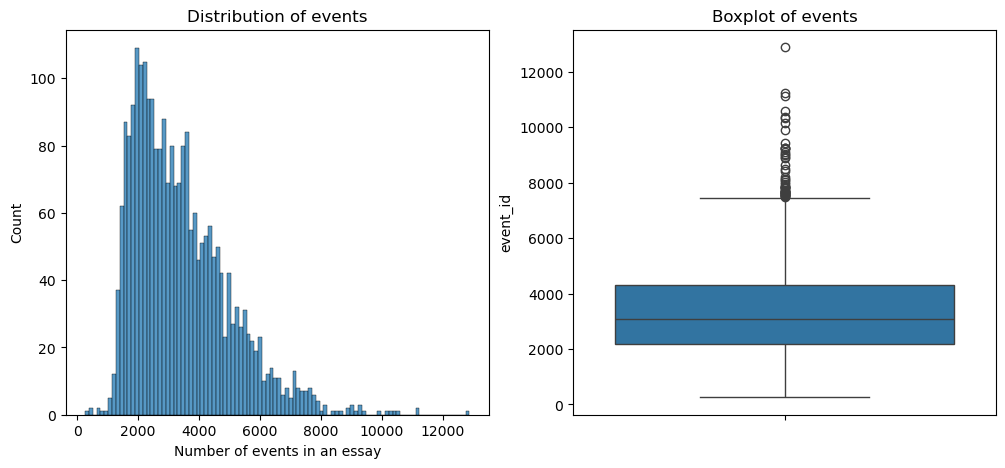

In [6]:
event_stats = data_features.groupby("id")['event_id'].count()

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Distribution of events')
ax[0].set_xlabel('Number of events in an essay')
sns.histplot(event_stats, bins=100, ax=ax[0])
ax[1].set_title('Boxplot of events')
sns.boxplot(event_stats, ax=ax[1])
plt.show()

In [7]:
event_stats.describe()


count     2471.000000
mean      3401.820316
std       1578.850387
min        262.000000
25%       2193.500000
50%       3082.000000
75%       4301.000000
max      12876.000000
Name: event_id, dtype: float64

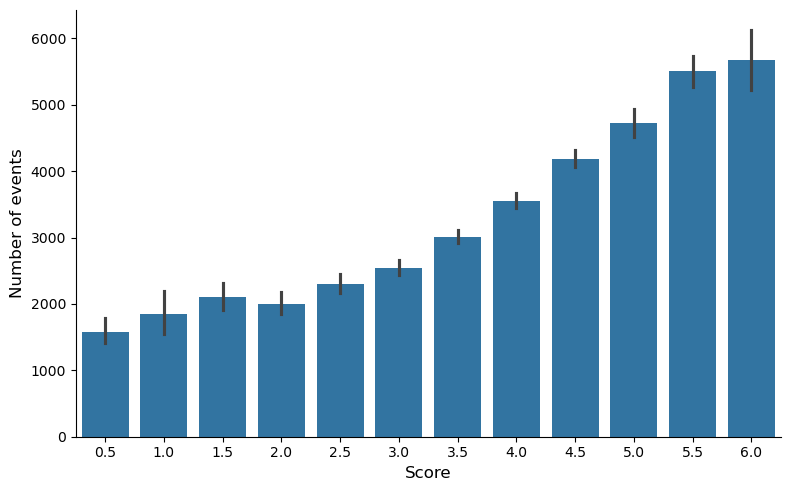

In [8]:
stats = data_features.groupby("id")["event_id"].max().reset_index()
stats_score = stats.merge(data_scores, on='id')

catplot = sns.catplot(data=stats_score, x="score", y="event_id", kind="bar", height=5, aspect=8/5)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Number of events', fontsize=12)
plt.show()


In [9]:
# Assuming 'df' is your DataFrame name
unique_users_per_score = stats_score.groupby('score')['id'].nunique().reset_index(name='unique_users')

print(unique_users_per_score)

    score  unique_users
0     0.5             5
1     1.0            35
2     1.5            69
3     2.0            92
4     2.5           201
5     3.0           336
6     3.5           486
7     4.0           501
8     4.5           402
9     5.0           179
10    5.5           128
11    6.0            37


In [10]:
stats_score

,id,event_id,score
0,001519c8,2557,3.5
1,0022f953,2454,3.5
2,0042269b,4136,6.0
3,0059420b,1556,2.0
4,0075873a,2531,4.0
...,...,...,...
2466,ffb8c745,4739,3.5
2467,ffbef7e5,2604,4.0
2468,ffccd6fd,3063,1.5
2469,ffec5b38,3242,5.0


In [11]:
def plot_dist_box(data, target):
        
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    # Plot the distribution plot on the first subplot
    sns.histplot(data, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    # Plot the box plot on the second subplot
    sns.boxplot(data, ax=axes[1])
    axes[1].set_title('Box Plot')
    
    # Plot the box plot on the second subplot
    sns.ecdfplot(data, ax=axes[2])
    axes[2].set_title('CDF Plot')
    
    # Plot the box plot on the second subplot
    sns.scatterplot(x=data, y=target, ax=axes[3])
    axes[3].set_title('Scatter Plot')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

In [12]:
data = pd.merge(data_scores, data_features, on='id', how='left')

In [13]:
data_agg = data.groupby("id")[['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count', 'score']].mean().reset_index()

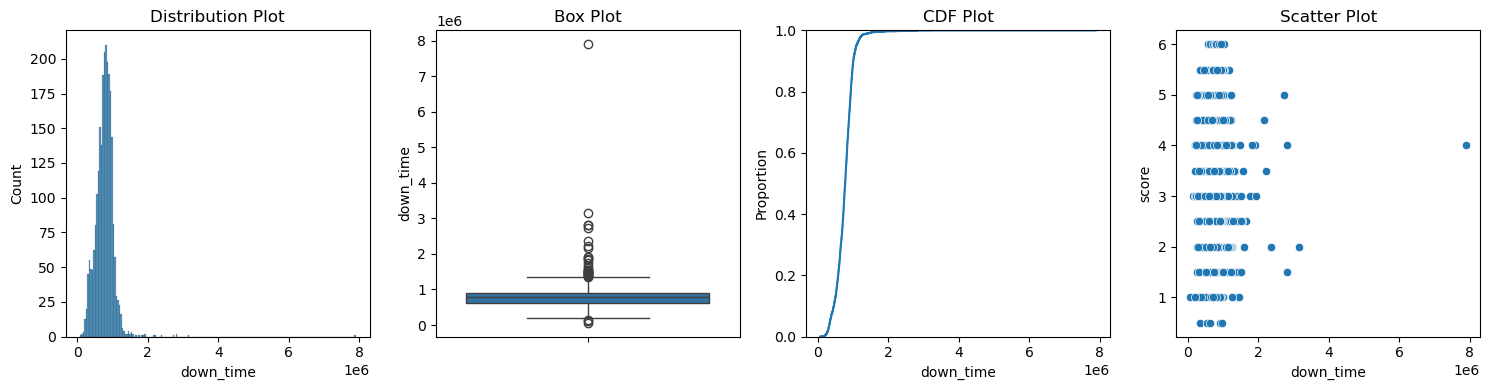

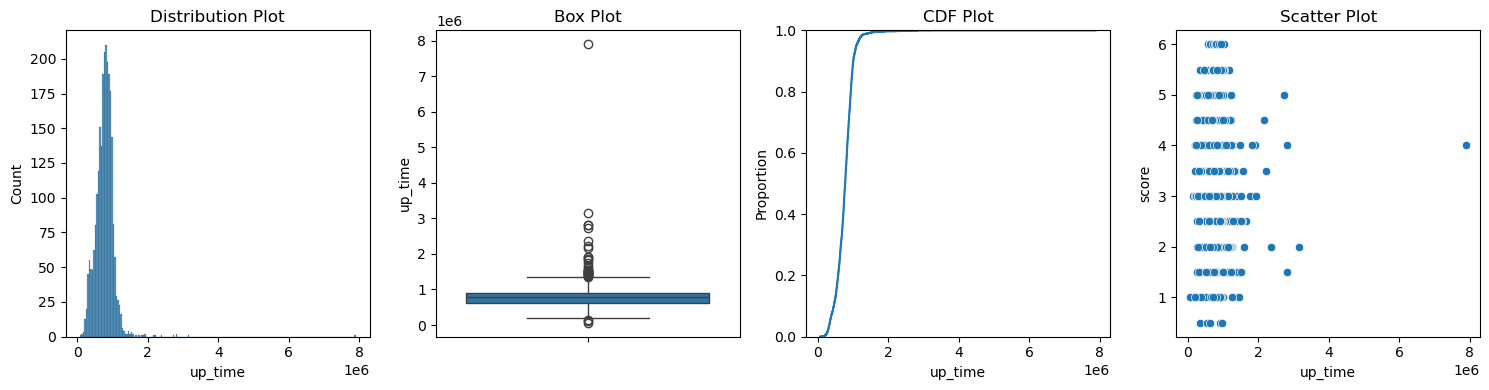

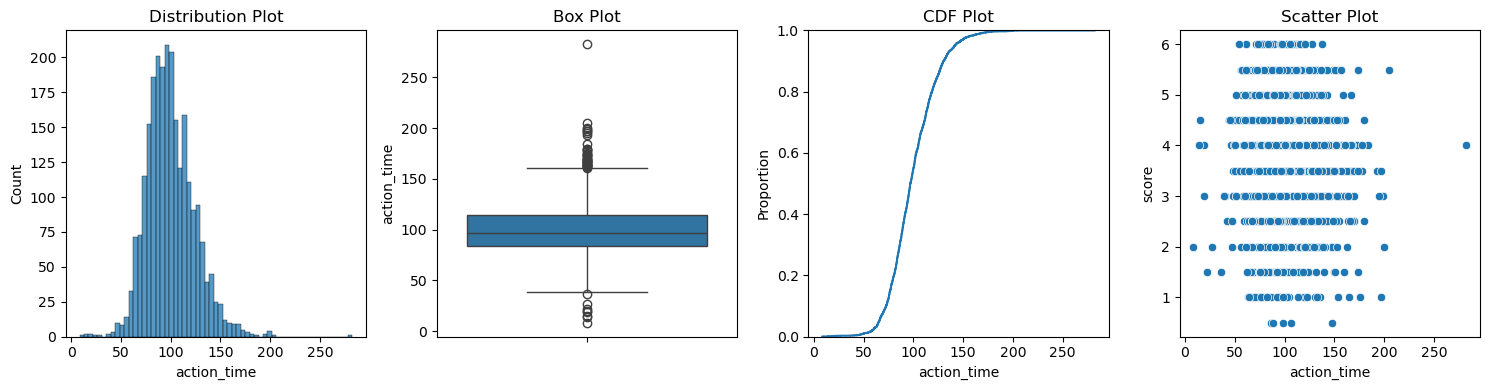

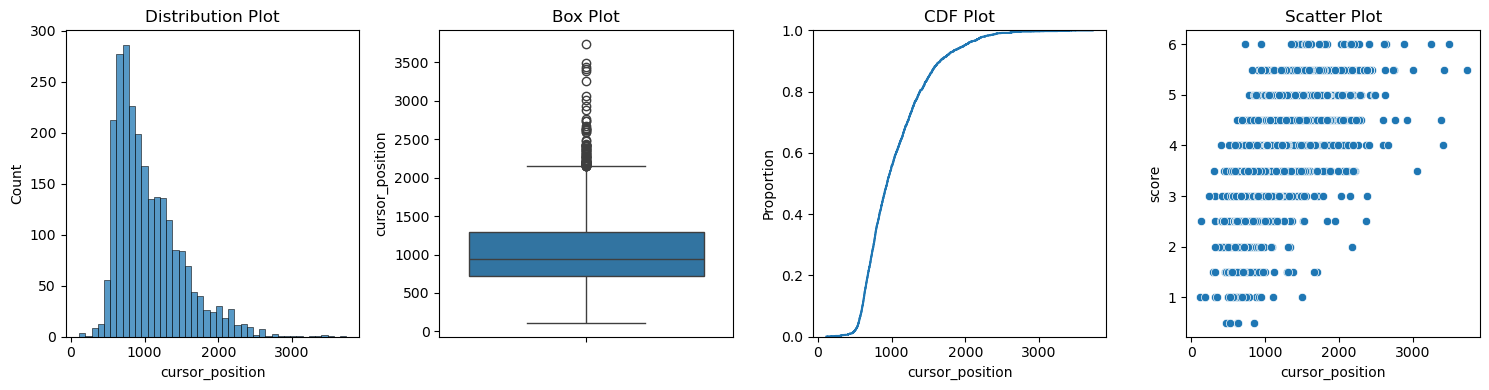

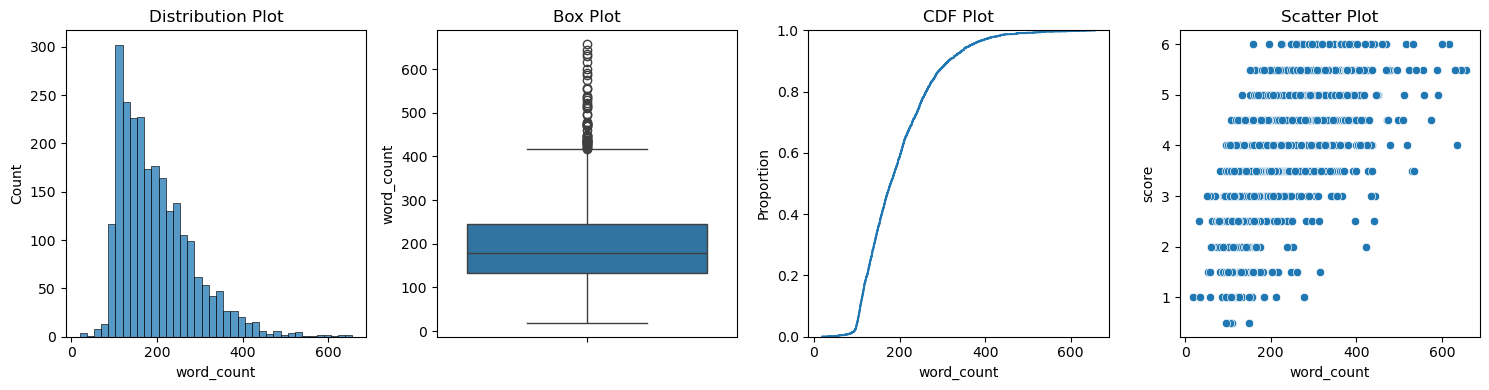

In [14]:
num_cols = ['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count']
for col in num_cols:
    plot_dist_box(data_agg[col], data_agg['score'])